# Financial Data Analysis with Python

### Instructor: Luping Yu

### Apr 19, 2022

***
## Lecture 07. Time Series

**Time series data** is an important form of structured data in many different fields, such as finance, economics, ecology, neuroscience, and physics. Anything that is observed or measured at many points in time forms a time series. 

Many time series are fixed frequency, which is to say that data points occur at regular intervals according to some rule, such as every 15 seconds, every 5 minutes, or once per month.

How you mark and refer to time series data depends on the application, and you may have one of the following:
* **Timestamps**: specific instants in time.
* **Fixed periods**: such as the month January 2007 or the full year 2010.
* **Intervals of time**: indicated by a start and end timestamp. (periods can be thought of as special cases of intervals)

The simplest and most widely used kind of time series are those indexed by **timestamp**.

![avatar](https://raw.githubusercontent.com/lazydingding/gallery/main/date_stamp.jpg)


***
###  Date and Time Data Types and Tools

The Python standard library includes data types for date and time data, as well as calendar-related functionality. The **datetime**, **time**, and **calendar** modules are the main places to start. The **datetime.datetime** type, or simply **datetime**, is widely used:

In [3]:
from datetime import datetime

now = datetime.now()

now

datetime.datetime(2022, 4, 19, 16, 51, 6, 819000)

In [4]:
now.year, now.month, now.day

(2022, 4, 19)

**datetime** stores both the date and time down to the microsecond. **timedelta** represents the temporal difference between two datetime objects:

In [6]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)

delta

datetime.timedelta(days=926, seconds=56700)

In [165]:
delta.days

926

You can add (or subtract) a **timedelta** or multiple thereof to a **datetime** object to yield a new shifted object:

In [7]:
from datetime import timedelta

start = datetime(2011, 1, 7)

start - timedelta(2)

datetime.datetime(2011, 1, 5, 0, 0)

In [170]:
start + 2 * timedelta(weeks=2)

datetime.datetime(2011, 2, 4, 0, 0)

The following table summarizes the data types in the **datetime** module. While this chapter is mainly concerned with the data types in pandas and higher-level time series manipulation, you may encounter the datetime-based types in many other places in Python in the wild.

* Types in datetime module:

|Type | Description |
|:- | :- | 
|date | Store calendar date (year, month, day) using the Gregorian calendar
|time | Store time of day as hours, minutes, seconds, and microseconds
|datetime | Stores both date and time
|timedelta | Represents the difference between twodatetimevalues (as days, seconds, and microseconds)
|tzinfo | Base type for storing time zone information

***
### Converting Between String and Datetime

You can format **datetime** objects and pandas **Timestamp** objects as strings using <u>str</u> or the <u>strftime</u> method, passing a format specification:

In [10]:
stamp = datetime(2011, 1, 3)

str(stamp)

'2011-01-03 00:00:00'

You can use these same format codes to convert strings to dates using <u>datetime.strptime</u>:

In [14]:
value = '99:01:03'

datetime.strptime(value, '%y:%m:%d')

datetime.datetime(1999, 1, 3, 0, 0)

See the following table for a complete list of the format codes.

* Datetime format specification (ISO C89 compatible)

|Type | Description |
|:- | :- | 
|%Y|Four-digit year
|%y|Two-digit year
|%m|Two-digit month [01, 12]
|%d|Two-digit day [01, 31]
|%H|Hour (24-hour clock) [00, 23]
|%I|Hour (12-hour clock) [01, 12]
|%M|Two-digit minute [00, 59]
|%S|Second [00, 61] (seconds 60, 61 account for leap seconds)
|%w|Weekday as integer [0 (Sunday), 6]
|%U|Week number of the year [00, 53]; Sunday is considered the first day of the week, and days before the first Sunday of the year are "week 0"
|%W|Week number of the year [00, 53]; Monday is considered the first day of the week, and days before the first Monday of the year are "week 0"
|%z|UTC time zone offset as+HHMMor-HHMM; empty if time zone naive
|%F|Shortcut for%Y-%m-%d (e.g.,2012-4-18)
|%D|Shortcut for%m/%d/%y (e.g.,04/18/12)



<u>datetime.strptime</u> is a good way to parse a date with a **known** format.

However, it can be a bit annoying to have to write a format spec each time, especially for common date formats. In this case, you can use the **parser.parse** method in the third-party dateutil package (this is installed automatically when you install pandas):

In [15]:
from dateutil.parser import parse

parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

**dateutil.parser** is capable of parsing most human-intelligible date representations:

In [14]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

**dateutil.parser** is a useful but **imperfect** tool.  Notably, it will recognize some strings as dates that you might prefer that it didn't.

In international locales, day appearing before month is very common, so you can pass <u>dayfirst=True</u> to indicate this:

In [16]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

<u>pandas is generally oriented toward working with arrays of dates</u>, whether used as an axis index or a column in a DataFrame.

The **to_datetime** method parses many different kinds of date representations:

In [180]:
import pandas as pd

datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']

pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

***
###  Time Series Basics

A basic kind of time series object in pandas is a <u>Series indexed by timestamps</u>, which is often represented external to pandas as Python strings or *datetime* objects:

In [18]:
import numpy as np
import pandas as pd
from datetime import datetime

dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

ts = pd.Series(np.random.randn(6), index=dates)

ts

2011-01-02    1.251650
2011-01-05   -1.053581
2011-01-07    1.064260
2011-01-08   -1.783022
2011-01-10    0.856692
2011-01-12   -0.945739
dtype: float64

These *datetime* objects have been put in a **DatetimeIndex**:

In [19]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

Scalar values from a DatetimeIndex are pandas **Timestamp** objects. <u>A Timestamp can be substituted anywhere you would use a datetime object</u>.

In [20]:
stamp = ts.index[0]

stamp

Timestamp('2011-01-02 00:00:00')

***
### Indexing, Selection, Subsetting

Time series behaves like any other *pandas.Series* when you are indexing and selecting data based on label:

In [21]:
ts

2011-01-02    1.251650
2011-01-05   -1.053581
2011-01-07    1.064260
2011-01-08   -1.783022
2011-01-10    0.856692
2011-01-12   -0.945739
dtype: float64

In [22]:
stamp = ts.index[2]

stamp

Timestamp('2011-01-07 00:00:00')

In [23]:
ts[stamp]

1.0642600281082697

As a convenience, you can also pass a string that is interpretable as a date:

In [24]:
ts

2011-01-02    1.251650
2011-01-05   -1.053581
2011-01-07    1.064260
2011-01-08   -1.783022
2011-01-10    0.856692
2011-01-12   -0.945739
dtype: float64

In [27]:
ts['Jan/07/2011']

1.0642600281082697

In [28]:
ts['20110107']

1.0642600281082697

For longer time series, a year or only a year and month can be passed to easily select slices of data:

In [29]:
longer_ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

longer_ts

2000-01-01    0.312578
2000-01-02    0.596198
2000-01-03    0.697875
2000-01-04   -0.179929
2000-01-05   -0.146580
                ...   
2002-09-22   -0.284452
2002-09-23   -0.136942
2002-09-24   -0.086592
2002-09-25    0.818507
2002-09-26   -0.696152
Freq: D, Length: 1000, dtype: float64

In [30]:
longer_ts['2001']

2001-01-01   -0.769534
2001-01-02    1.949106
2001-01-03    0.817116
2001-01-04    1.381767
2001-01-05   -0.490917
                ...   
2001-12-27   -0.009985
2001-12-28    0.174464
2001-12-29    1.115569
2001-12-30    0.147057
2001-12-31   -0.093252
Freq: D, Length: 365, dtype: float64

Here, the string '2001' is interpreted as a year and selects that time period. This also works if you specify the month:

In [31]:
longer_ts['2001-05']

2001-05-01   -0.130650
2001-05-02   -0.472793
2001-05-03   -0.493381
2001-05-04   -1.892522
2001-05-05    0.360785
2001-05-06    0.655771
2001-05-07   -1.583767
2001-05-08    1.237444
2001-05-09    0.391545
2001-05-10    0.186016
2001-05-11    1.373512
2001-05-12    0.196252
2001-05-13    0.608064
2001-05-14   -0.220006
2001-05-15   -0.839177
2001-05-16    0.198277
2001-05-17    0.651128
2001-05-18   -1.168067
2001-05-19    0.642175
2001-05-20    0.070265
2001-05-21   -0.517247
2001-05-22   -1.191891
2001-05-23    0.558533
2001-05-24    0.077835
2001-05-25    0.673958
2001-05-26   -0.700099
2001-05-27   -0.953933
2001-05-28   -0.165233
2001-05-29    0.941227
2001-05-30    1.225369
2001-05-31    0.048593
Freq: D, dtype: float64

Slicing with datetime objects works as well:

In [32]:
ts

2011-01-02    1.251650
2011-01-05   -1.053581
2011-01-07    1.064260
2011-01-08   -1.783022
2011-01-10    0.856692
2011-01-12   -0.945739
dtype: float64

In [33]:
ts['1/7/2011':]

2011-01-07    1.064260
2011-01-08   -1.783022
2011-01-10    0.856692
2011-01-12   -0.945739
dtype: float64

Because most time series data is ordered chronologically, you can slice with timestamps not contained in a time series to perform a range query:

In [34]:
ts['Jan/6/2011':'1/11/2011']

2011-01-07    1.064260
2011-01-08   -1.783022
2011-01-10    0.856692
dtype: float64

As before, you can pass **either** a <u>string date, datetime, or timestamp</u>.

All of this holds true for DataFrame as well, indexing on its rows:

In [35]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')

long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado','Texas','New York','Ohio'])

long_df

,Colorado,Texas,New York,Ohio
2000-01-05,-0.156775,-0.477977,-0.191097,0.629015
2000-01-12,-0.974297,0.086133,1.501712,0.115270
2000-01-19,-0.317159,-0.503427,-1.227899,0.606062
2000-01-26,-1.319005,0.641323,-0.539941,1.086689
2000-02-02,0.414956,1.304858,-1.453901,-0.729413
...,...,...,...,...
2001-10-31,-0.617857,0.834849,0.955264,-0.234261
2001-11-07,0.937082,0.465809,-0.092220,-0.305829
2001-11-14,1.128170,-0.300652,0.209885,0.533275
2001-11-21,-0.408077,0.438446,-1.165596,-0.356710


In [39]:
long_df.loc['2001---May']

,Colorado,Texas,New York,Ohio
2001-05-02,-1.307833,0.568524,-1.739897,0.025521
2001-05-09,1.036505,0.188383,-0.142362,1.840957
2001-05-16,-0.417828,-0.501220,1.226384,-1.265089
2001-05-23,-0.231898,1.137886,-0.330258,0.977564
2001-05-30,-0.503937,1.078895,-0.450677,0.499868


***
### Date Ranges, Frequencies, and Shifting

Time series in pandas are assumed to be irregular; that is, they have no fixed frequency.

For many applications this is sufficient. However, it's often desirable to work relative to a fixed frequency, such as daily, monthly, or every 15 minutes, even if that means introducing missing values into a time series.

Fortunately pandas has a full suite of standard time series frequencies and tools for <u>resampling, inferring frequencies, and generating fixed-frequency date ranges</u>.

While we used it previously without explanation, **pandas.date_range** is responsible for generating a *DatetimeIndex* with an indicated length according to a particular frequency:

In [47]:
index = pd.date_range('2012-04-01', '2012-06-01')

index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

By default, **date_range** generates daily timestamps.

If you pass only a start or end date, you must pass a number of periods to generate:

In [48]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [49]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

The start and end dates define strict boundaries for the generated date index.

For example, if you wanted a date index containing the <u>last business day of each month</u>, you would pass the 'BM' frequency (business end of month; see more complete listing of frequencies in the following table) and only dates falling on or inside the date interval will be included:

In [50]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

*  Base time series frequencies (not comprehensive)

|Alias | Offset type | Description |
|:- | :- | :- |
|D|Day|Calendar daily
|B|BusinessDay|Business daily
|H|Hour|Hourly
|T or min|Minute|Minutely
|S|Second|Secondly
|L or ms|Milli|Millisecond (1/1,000 of 1 second)
|U|Micro|Microsecond (1/1,000,000 of 1 second)
|M|MonthEnd|Last calendar day of month
|BM|BusinessMonthEnd|Last business day (weekday) of month
|MS|MonthBegin|First calendar day of month
|BMS|BusinessMonthBegin|First weekday of month
|W-MON, W-TUE, ...|Week|Weekly on given day of week (MON, TUE, WED, THU, FRI, SAT, or SUN)
|WOM-1MON, WOM-2MON, ...|WeekOfMonth|Generate weekly dates in the first, second, third, or fourth week of the month (e.g.,WOM-3FRIfor the third Friday of each month)
|Q-JAN, Q-FEB, ...|QuarterEnd|Quarterly dates anchored on last calendar day of each month, for year ending in indicated month (JAN, FEB, MAR, APR, MAY, JUN, JUL, AUG, SEP, OCT, NOV, or DEC)
|BQ-JAN, BQ-FEB, ...|BusinessQuarterEnd|Quarterly dates anchored on last weekday day of each month, for year ending in indicated month
|QS-JAN, QS-FEB, ...|QuarterBegin|Quarterly dates anchored on first calendar day of each month, for year ending in indicated month
|BQS-JAN, BQS-FEB, ...|BusinessQuarterBegin|Quarterly dates anchored on first weekday day of each month, for year ending in indicated month
|A-JAN, A-FEB, ...|YearEnd|Annual dates anchored on last calendar day of given month (JAN, FEB, MAR, APR, MAY, JUN, JUL, AUG, SEP, OCT, NOV, or DEC)
|BA-JAN, BA-FEB, ...|BusinessYearEnd|Annual dates anchored on last weekday of given month
|AS-JAN, AS-FEB, ...|YearBegin|Annual dates anchored on first day of given month
|BAS-JAN, BAS-FEB, ...|BusinessYearBegin|Annual dates anchored on first weekday of given month

Frequencies in pandas are composed of a <u>base frequency</u> and a <u>multiplier</u>.

Base frequencies are typically referred to by a string alias, like 'M' for monthly or 'H' for hourly. Putting an integer before the base frequency creates a multiple:

In [51]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4H')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

Some frequencies describe points in time that are <u>not evenly spaced</u>. For example, 'M' (calendar month end) and 'BM' (last business/weekday of month) depend on the number of days in a month and whether the month ends on a weekend or not. We refer to these as **anchored offsets**.

One useful frequency class is "week of month," starting with <u>WOM</u>. This enables you to get dates like the third Friday of each month:

In [53]:
third_friday = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')

third_friday

DatetimeIndex(['2012-01-20', '2012-02-17', '2012-03-16', '2012-04-20',
               '2012-05-18', '2012-06-15', '2012-07-20', '2012-08-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

**Shifting** refers to moving data backward and forward through time.

Both Series and DataFrame have a shift method for doing naive shifts forward or backward, leaving the index unmodified:

In [54]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))

ts

2000-01-31   -0.131352
2000-02-29   -0.306660
2000-03-31   -1.009149
2000-04-30   -0.692533
Freq: M, dtype: float64

In [55]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.131352
2000-04-30   -0.306660
Freq: M, dtype: float64

In [56]:
ts.shift(-2)

2000-01-31   -1.009149
2000-02-29   -0.692533
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

When we shift like this, missing data is introduced either at the start or the end of the time series.

A common use of shift is computing <u>percent changes in a time series</u> or multiple time series as DataFrame columns. This is expressed as:

In [57]:
ts

2000-01-31   -0.131352
2000-02-29   -0.306660
2000-03-31   -1.009149
2000-04-30   -0.692533
Freq: M, dtype: float64

In [58]:
 ts / ts.shift(1) - 1

2000-01-31         NaN
2000-02-29    1.334639
2000-03-31    2.290775
2000-04-30   -0.313746
Freq: M, dtype: float64

Because naive shifts leave the index unmodified, some data is *discarded*.

Thus <u>if the frequency is known</u>, it can be passed to shift to advance the timestamps instead of simply the data:

In [59]:
ts

2000-01-31   -0.131352
2000-02-29   -0.306660
2000-03-31   -1.009149
2000-04-30   -0.692533
Freq: M, dtype: float64

In [60]:
ts.shift(2, freq='M')

2000-03-31   -0.131352
2000-04-30   -0.306660
2000-05-31   -1.009149
2000-06-30   -0.692533
Freq: M, dtype: float64

In [61]:
ts.shift(3, freq='D')

2000-02-03   -0.131352
2000-03-03   -0.306660
2000-04-03   -1.009149
2000-05-03   -0.692533
dtype: float64

***

### Time Zone Handling

Working with time zones is generally considered one of the most unpleasant parts of time series manipulation :(

As a result, many time series users choose to work with time series in <u>coordinated universal time</u> or **UTC**, which is the successor to Greenwich Mean Time and is the current international standard.

<u>Time zones are expressed as offsets from UTC</u>; for example, New York is four hours behind UTC during daylight saving time and five hours behind the rest of the year. The time in China follows a single standard time offset of UTC+08:00 (eight hours ahead of UTC), even though China spans almost five geographical time zones.

By default, time series in pandas are time zone naive. For example, consider the following time series:

In [62]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')

ts = pd.Series(np.random.randn(len(rng)), index=rng)

ts

2012-03-09 09:30:00    0.869415
2012-03-10 09:30:00   -0.494939
2012-03-11 09:30:00    0.165690
2012-03-12 09:30:00    1.395749
2012-03-13 09:30:00    0.081516
2012-03-14 09:30:00    1.341207
Freq: D, dtype: float64

Conversion from naive to localized is handled by the **tz_localize** method:

In [63]:
ts_utc = ts.tz_localize('UTC')

ts_utc

2012-03-09 09:30:00+00:00    0.869415
2012-03-10 09:30:00+00:00   -0.494939
2012-03-11 09:30:00+00:00    0.165690
2012-03-12 09:30:00+00:00    1.395749
2012-03-13 09:30:00+00:00    0.081516
2012-03-14 09:30:00+00:00    1.341207
Freq: D, dtype: float64

Once a time series has been localized to a particular time zone, it can be converted to another time zone with **tz_convert**:

[List of all time zones](https://www.zeitverschiebung.net/en/all-time-zones.html)

In [64]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00    0.869415
2012-03-10 04:30:00-05:00   -0.494939
2012-03-11 05:30:00-04:00    0.165690
2012-03-12 05:30:00-04:00    1.395749
2012-03-13 05:30:00-04:00    0.081516
2012-03-14 05:30:00-04:00    1.341207
Freq: D, dtype: float64

In [65]:
ts_utc.tz_convert('Asia/Shanghai')

2012-03-09 17:30:00+08:00    0.869415
2012-03-10 17:30:00+08:00   -0.494939
2012-03-11 17:30:00+08:00    0.165690
2012-03-12 17:30:00+08:00    1.395749
2012-03-13 17:30:00+08:00    0.081516
2012-03-14 17:30:00+08:00    1.341207
Freq: D, dtype: float64

***
### Periods and Period Arithmetic

**Periods** represent timespans, like days, months, quarters, or years. The Period class represents this data type, requiring a string or integer and a frequency.

In [73]:
p = pd.Period(2007, freq='A-MAY')

p

Period('2007', 'A-MAY')

In this case, the Period object represents the full timespan from January 1, 2007, to December 31, 2007, inclusive.

#### Period Frequency Conversion
Periods and PeriodIndex objects can be converted to another frequency with their **asfreq** method.

As an example, suppose we had an annual period and wanted to convert it into a monthly period either at the start or end of the year. This is fairly straightforward:

In [72]:
p.asfreq('M', how='start')

Period('2006-06', 'M')

In [71]:
p.asfreq('M', how='end')

Period('2007-05', 'M')

* Period frequency conversion illustration

![avatar](https://raw.githubusercontent.com/lazydingding/gallery/main/Screen%20Shot%202022-04-19%20at%2011.13.09.png)

#### Quarterly Period Frequencies

Quarterly data is standard in accounting, finance, and other fields. Much quarterly data is reported relative to a **fiscal year end**, typically the last calendar or business day of one of the 12 months of the year.

pandas supports all 12 possible quarterly frequencies as Q-JAN through Q-DEC:

In [74]:
p = pd.Period('2012Q4', freq='Q-JAN')

p

Period('2012Q4', 'Q-JAN')

In the case of fiscal year ending in January, 2012Q4 runs from November through January, which you can check by converting to daily frequency:

In [75]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [76]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

* Different quarterly frequency conventions

![avatar](https://raw.githubusercontent.com/lazydingding/gallery/main/Screen%20Shot%202022-04-19%20at%2011.15.10.png)

***
### Resampling and Frequency Conversion

**Resampling** refers to the process of converting a time series from one frequency to another.

Aggregating higher frequency data to lower frequency is called **downsampling**, while converting lower frequency to higher frequency is called **upsampling**.

pandas objects are equipped with a **resample** method, which is the workhorse function for all frequency conversion.

<u>resample has a similar API to groupby</u>; you call resample to group the data, then call an aggregation function:

In [77]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')

ts = pd.Series(np.random.randn(len(rng)), index=rng)

ts  

2000-01-01   -0.614837
2000-01-02   -1.752143
2000-01-03    1.657289
2000-01-04   -2.912332
2000-01-05    1.088864
                ...   
2000-04-05    0.279279
2000-04-06   -1.479116
2000-04-07   -0.289600
2000-04-08   -1.146413
2000-04-09   -0.675817
Freq: D, Length: 100, dtype: float64

In [78]:
ts.resample('M').mean()

2000-01-31   -0.106702
2000-02-29    0.144593
2000-03-31    0.038088
2000-04-30   -0.777143
Freq: M, dtype: float64

In [79]:
ts.resample('M', kind='period').mean()

2000-01   -0.106702
2000-02    0.144593
2000-03    0.038088
2000-04   -0.777143
Freq: M, dtype: float64

**resample** is a flexible and high-performance method that can be used to process very large time series. The following table summarizes some of its options.

* Resample method arguments

|Argument | Description |
|:- | :- | 
|freq|String or DateOffset indicating desired resampled frequency (e.g., ‘M', ’5min', or Second(15))
|axis|Axis to resample on; default axis=0
|fill_method|How to interpolate when upsampling, as in 'ffill' or 'bfill'; by default does no interpolation
|closed|In downsampling, which end of each interval is closed (inclusive), 'right' or 'left'
|label|In downsampling, how to label the aggregated result, with the 'right' or 'left' bin edge (e.g., the 9:30 to 9:35 five-minute interval could be labeled9:30or9:35)
|loffset|Time adjustment to the bin labels, such as '-1s' / Second(-1) to shift the aggregate labels one second earlier
|limit|When forward or backward filling, the maximum number of periods to fill
|kind|Aggregate to periods ('period') or timestamps ('timestamp'); defaults to the type of index the time series has
|convention|When resampling periods, the convention ('start' or 'end') for convert

#### Downsampling

Aggregating data to a regular, lower frequency is a pretty normal time series task.

The desired frequency defines bin edges that are used to slice the time series into pieces to aggregate. For example, to convert to monthly, 'M' or 'BM', you need to chop up the data into one-month intervals.

Each interval is said to be half-open; a data point can only belong to one interval, and the union of the intervals must make up the whole time frame.

To illustrate, let’s look at some one-minute data:

In [80]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')

ts = pd.Series(np.arange(12), index=rng)

ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

Suppose you wanted to aggregate this data into five-minute chunks or bars by taking the sum of each group:

In [82]:
ts.resample('5min').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

#### Upsampling and Interpolation

When converting from a low frequency to a higher frequency, no aggregation is needed.

Let’s consider a DataFrame with some weekly data:

In [83]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2, freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])

frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.230633,0.370219,-0.527692,1.490458
2000-01-12,1.424555,-0.800061,0.977009,-0.084160


When you are using an aggregation function with this data, there is only one value per group, and missing values result in the gaps.

We use the **asfreq** method to convert to the higher frequency without any aggregation:

In [84]:
df_daily = frame.resample('D').asfreq()

df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.230633,0.370219,-0.527692,1.490458
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.424555,-0.800061,0.977009,-0.084160


Suppose you wanted to fill forward each weekly value on the non-Wednesdays:

In [85]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.230633,0.370219,-0.527692,1.490458
2000-01-06,-0.230633,0.370219,-0.527692,1.490458
2000-01-07,-0.230633,0.370219,-0.527692,1.490458
2000-01-08,-0.230633,0.370219,-0.527692,1.490458
2000-01-09,-0.230633,0.370219,-0.527692,1.490458
2000-01-10,-0.230633,0.370219,-0.527692,1.490458
2000-01-11,-0.230633,0.370219,-0.527692,1.490458
2000-01-12,1.424555,-0.800061,0.977009,-0.084160


You can similarly choose to only fill a certain number of periods forward to limit how far to continue using an observed value:

In [86]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-0.230633,0.370219,-0.527692,1.490458
2000-01-06,-0.230633,0.370219,-0.527692,1.490458
2000-01-07,-0.230633,0.370219,-0.527692,1.490458
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.424555,-0.800061,0.977009,-0.084160


***
### Moving Window Functions

Before digging in, we can load up some time series data and resample it to business day frequency:

In [87]:
close_px_all = pd.read_csv('examples/stock_px_2.csv',
                           parse_dates=True, index_col=0)

close_px_all

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66


In [89]:
close_px = close_px_all.resample('B').ffill()

close_px

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66


We now introduce the **rolling** operator, which behaves similarly to *resample* and *groupby*. It can be called on a Series or DataFrame along with a window:

<AxesSubplot:>

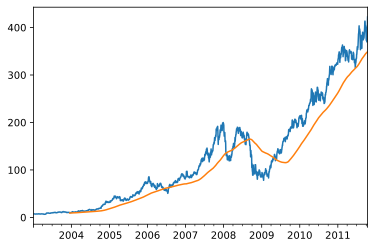

In [90]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

close_px['AAPL'].plot()
close_px['AAPL'].rolling(250).mean().plot()

Some statistical operators, like correlation and covariance, need to operate on two time series.

As an example, financial analysts are often interested in a stock’s correlation to a benchmark index like the S&P 500. To have a look at this, we first compute the percent change for all of our time series of interest:

In [91]:
returns = close_px / close_px.shift(1) - 1

returns

,AAPL,MSFT,XOM,SPX
2003-01-02,NaN,NaN,NaN,NaN
2003-01-03,0.006757,0.001421,0.000684,-0.000484
2003-01-06,0.000000,0.017975,0.024624,0.022474
2003-01-07,-0.002685,0.019052,-0.033712,-0.006545
2003-01-08,-0.020188,-0.028272,-0.004145,-0.014086
...,...,...,...,...
2011-10-10,0.051406,0.026286,0.036977,0.034125
2011-10-11,0.029526,0.002227,-0.000131,0.000544
2011-10-12,0.004747,-0.001481,0.011669,0.009795
2011-10-13,0.015515,0.008160,-0.010238,-0.002974


The **corr** aggregation function after we call rolling can then compute the rolling correlation with S&P Index:

<AxesSubplot:title={'center':'Six-month AAPL return correlation to S&P 500'}>

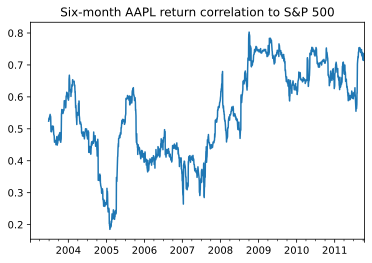

In [92]:
corr = returns['AAPL'].rolling(125).corr(returns['SPX'])

corr.plot(title="Six-month AAPL return correlation to S&P 500")

<AxesSubplot:title={'center':'Six-month return correlations to S&P 500'}>

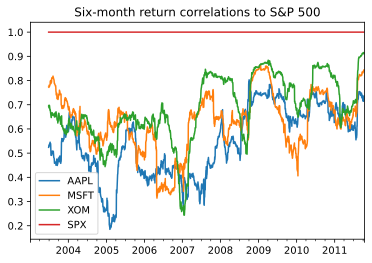

In [46]:
corr = returns.rolling(125).corr(returns['SPX'])

corr.plot(title="Six-month return correlations to S&P 500")